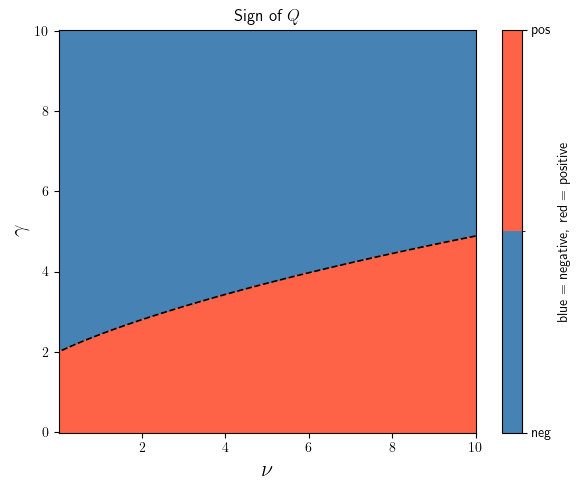

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.special as sp
from scipy.integrate import quad
import matplotlib as mpl

# ------------------------------------------------------------
# Tell Matplotlib to use LaTeX  (Greek letters written as macros)
# ------------------------------------------------------------
mpl.rcParams['text.usetex']       = True
mpl.rcParams['axes.unicode_minus'] = False          # keep minus signs

# If you really want \text{…} etc. you could uncomment this:
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# ------------------------------------------------------------
# Q(nu, gamma)
# ------------------------------------------------------------
def Q(nu, gamma):
    def integrand(x):
        num  = (1 - x) * (1 - (gamma + 1) * x)
        beta = sp.beta(nu * x + 1, nu * (1 - x) + gamma) / \
               sp.beta(nu * x + 1, nu * (1 - x) + 1)
        return num * beta / (nu + gamma + 1)
    val, _ = quad(integrand, 0.0, 1.0)
    return val

# ------------------------------------------------------------
# (ν, γ) grid
# ------------------------------------------------------------
nu_vals    = np.linspace(0.0, 10, 1200)[1:]   # skip ν = 0
gamma_vals = np.linspace(0.01, 10.0, 220)     # γ ∈ (0,10]
N, G       = np.meshgrid(nu_vals, gamma_vals)

Q_grid = np.empty_like(N)
for i, g in enumerate(gamma_vals):
    for j, nu in enumerate(nu_vals):
        Q_grid[i, j] = Q(nu, g)

# ------------------------------------------------------------
# Two-colour map for the sign of Q
# ------------------------------------------------------------
cmap = mcolors.ListedColormap(["steelblue", "tomato"])   # blue / red
norm = mcolors.BoundaryNorm([-1, 0, 1], cmap.N)          # <0 → blue, >0 → red

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
plt.figure(figsize=(6, 5))
pcm = plt.pcolormesh(N, G, np.sign(Q_grid), cmap=cmap, norm=norm, shading="auto")

cbar = plt.colorbar(pcm, ticks=[-1, 1])
cbar.set_ticklabels(["neg", "pos"])          # <-- plain words, no \text{…}
cbar.set_label(r"blue = negative,  red = positive")

# dashed Q = 0 contour
plt.contour(N, G, Q_grid, levels=[0], colors="k", linestyles="--", linewidths=1.2)

plt.xlabel(r"$\nu$", fontsize=16, fontweight='normal')
plt.ylabel(r"$\gamma$", fontsize=16, fontweight='normal')
plt.title(r"Sign of $Q$")
plt.tight_layout()

# Save the plot before displaying it
plt.savefig('sign_of_q.png', dpi=600, bbox_inches='tight')
plt.show()


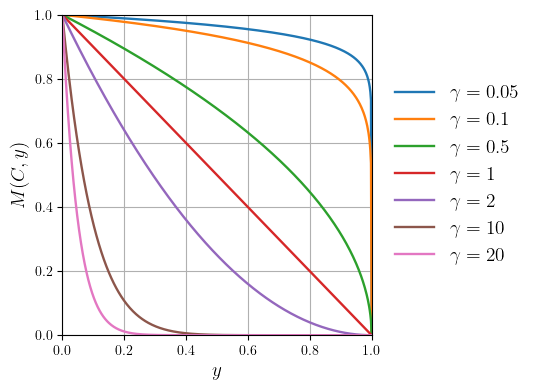

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(y, gamma, alpha=1):
    return alpha * (1 - y) ** gamma

y = np.linspace(0, 1, 500)
gamma_values = [0.05, 0.1, 0.5, 1, 2, 10, 20]

plt.rcParams['text.usetex'] = True

# a bit wider so the legend fits
plt.figure(figsize=(5.5, 4))

for g in gamma_values:
    plt.plot(y, f(y, g), label=rf'$\gamma = {g}$', linewidth=1.7)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"$y$", fontsize=14)
plt.ylabel(r"$M(C, y)$", fontsize=14)
plt.grid(True)

# --- legend outside, centre-right ---
plt.legend(fontsize=14,
           loc="center left",          # align legend’s left edge
           bbox_to_anchor=(1.02, 0.5), # x = 1.02 (just outside), y = 0.5 (vert. centre)
           frameon=False)              # optional: no box outline

plt.tight_layout()
plt.savefig("extinction_probability.png", dpi=600, bbox_inches="tight")
plt.show()


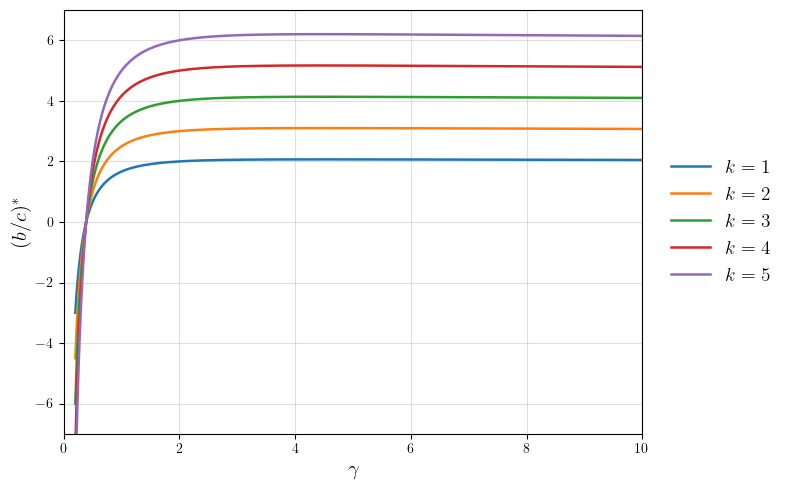

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ------------------------------------------------------------------
# Tell Matplotlib to use LaTeX and load amsmath (for safety)
# ------------------------------------------------------------------
mpl.rcParams['text.usetex']        = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['axes.unicode_minus']  = False   # nice minus sign

# ------------------------------------------------------------------
# b/c formula
# ------------------------------------------------------------------
def b_over_c(gamma, k):
    return (k + 1) * (1 + (gamma - 2) / (3*gamma**2 + 3*gamma))

gamma_vals = np.linspace(0.2, 10, 400)   # γ > 0
k_values   = [1, 2, 3, 4, 5]

# ------------------------------------------------------------------
# Plot
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))

for k in k_values:
    plt.plot(gamma_vals,
             b_over_c(gamma_vals, k),
             label=rf'$k = {k}$', lw=1.8)

plt.xlabel(r'$\gamma$', fontsize=15)
plt.ylabel(r'$(b/c)^*$',  fontsize=15)

# (use \frac, not \dfrac)
title = (r'$(b/c)(\gamma) = (k+1)\bigl[\,1 + '
         r'\frac{\gamma-2}{3\gamma^{2}+3\gamma}\bigr]$  '
         r'(with $\alpha/c = 1$)')
#plt.title(title, fontsize=11)
plt.xlim(0, 10)
plt.ylim(-7, 7)
plt.grid(alpha=0.4)
plt.legend(fontsize=15)

# --- legend outside, centre-right ---
plt.legend(fontsize=14,
           loc="center left",          # align legend’s left edge
           bbox_to_anchor=(1.02, 0.5), # x = 1.02 (just outside), y = 0.5 (vert. centre)
           frameon=False)              # optional: no box outline

plt.tight_layout()
plt.savefig("threshold_publi_low.png", dpi=600, bbox_inches="tight")
plt.show()


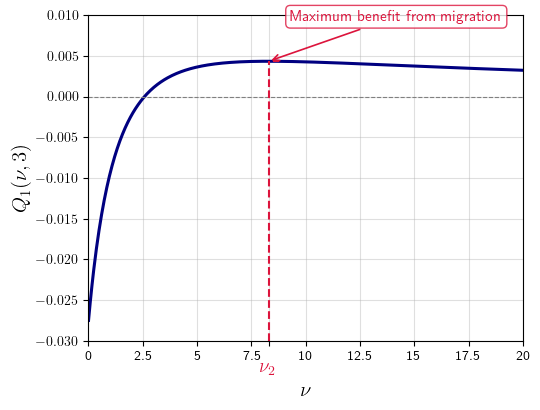

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- LaTeX formatting for text ---
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.unicode_minus'] = False

# --- Define Q(nu, gamma=3) ---
def Q(nu):
    return (3 * nu**2 - 20) / (30*(nu + 2) * (nu + 3) * (nu + 4))

# --- Values and critical point ---
nu_vals = np.linspace(0.01, 20, 500)
Q_vals = Q(nu_vals)
nu2 = 8.2932  # Critical nu
Q_nu2 = Q(nu2)

# --- Create figure ---
plt.figure(figsize=(5.5, 4.2))

# Main curve
plt.plot(nu_vals, Q_vals, lw=2.2, color='navy', label=r'$Q(\nu,3)$')

# Horizontal line at zero
plt.axhline(0, color='gray', lw=0.8, ls='--')

# Vertical dashed line ending at the curve
plt.vlines(nu2, ymin=-0.03, ymax=Q_nu2, color='crimson', lw=1.5, ls='--')

# Small horizontal marker at Q(nu2)
plt.hlines(y=Q_nu2, xmin=nu2 + 0.2, xmax=nu2 + 0.5,
           colors='crimson', lw=1.5)

# --- Custom xtick for ν_2 ---
xticks = plt.xticks()[0].tolist()
xticks.append(nu2)
plt.xticks(xticks,
           [r'$\nu_2$' if abs(x - nu2) < 1e-3 else f'{x:g}' for x in xticks])

# Highlight label styling
ax = plt.gca()
for lab in ax.get_xticklabels():
    if r'\nu_2' in lab.get_text():
        lab.set_fontsize(14)
        lab.set_color('crimson')
        lab.set_weight('bold')
        lab.set_y(lab.get_position()[1] - 0.025)

# --- Annotate biological interpretation ---
plt.annotate(r'Maximum benefit from migration',
             xy=(nu2, Q_nu2), xycoords='data',
             xytext=(nu2 + 1.0, Q_nu2 + 0.005),
             fontsize=11, color='crimson',
             arrowprops=dict(arrowstyle='->', lw=1.2, color='crimson'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='crimson', alpha=0.8))

# --- Labels and styling ---
plt.xlabel(r'$\nu$', fontsize=15)
plt.ylabel(r'$Q_1(\nu,3)$', fontsize=15)
plt.xlim(0, 20)
plt.ylim(-0.03, 0.01)
plt.grid(alpha=0.4)
plt.tight_layout()

# --- Save and show ---
plt.savefig("threshold_publi_sensitivity_low.png", dpi=600, bbox_inches="tight")
plt.show()


Calculating Q(nu, gamma) values. This may take some time...
Calculation complete.

Once the plot window appears:
- Click and drag your mouse on the plot to rotate it interactively.
- Use the scroll wheel to zoom in/out.


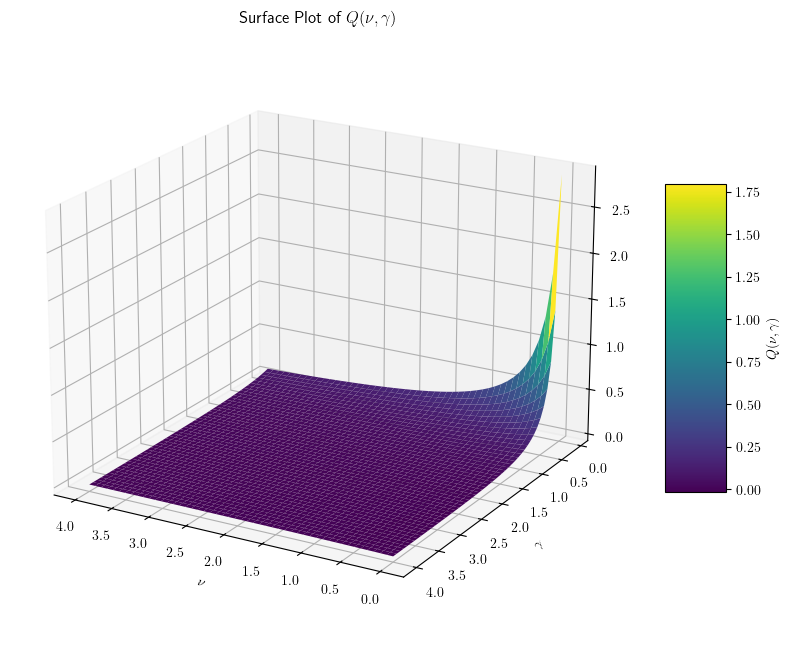

In [55]:
import numpy as np
from scipy.special import beta as B
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the integrand function
def integrand(x, nu, gamma):
    if x == 0:
        return 0
    if x == 1:
        return 0

    term1 = (1 - x)
    term2 = (1 - (gamma + 1) * x) / (nu + gamma + 1)
    term3 = B(nu * x + 1, nu * (1 - x) + gamma) / B(nu * x + 1, nu * (1 - x) + 1)
    return term1 * term2 * term3

# Define the function Q(nu, gamma)
def Q(nu, gamma):
    result, _ = quad(integrand, 0, 1, args=(nu, gamma))
    return result

# Set up the range for nu and gamma
nu_values = np.linspace(0, 4, 50)
gamma_values = np.linspace(0.1, 4, 50)

# Create a meshgrid for the 3D plot
Nu, Gamma = np.meshgrid(nu_values, gamma_values)

# Initialize a matrix to store the Z values (Q_values)
Q_values = np.zeros_like(Nu)

# Calculate Q(nu, gamma) for each pair of (nu, gamma)
print("Calculating Q(nu, gamma) values. This may take some time...")
for i in range(Nu.shape[0]):
    for j in range(Nu.shape[1]):
        Q_values[i, j] = Q(Nu[i, j], Gamma[i, j])
print("Calculation complete.")

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Nu, Gamma, Q_values, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$\gamma$')
#ax.set_zlabel(r'$Q(\nu, \gamma)$')
ax.set_title(r'Surface Plot of $Q(\nu, \gamma)$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, label=r'$Q(\nu, \gamma)$')

# --- Option to set initial viewing angle ---
# You can adjust these values to rotate the figure
# elev: elevation angle (vertical rotation in degrees). 0 is flat on the x-y plane.
# azim: azimuthal angle (horizontal rotation in degrees). 0 is looking along the x-axis.
ax.view_init(elev=20, azim=120) # Example: Rotate to a specific view that might be good

# --- How to rotate interactively ---
print("\nOnce the plot window appears:")
print("- Click and drag your mouse on the plot to rotate it interactively.")
print("- Use the scroll wheel to zoom in/out.")

plt.show()

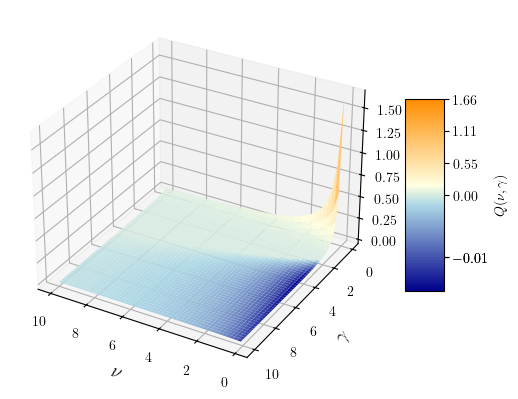

In [77]:
import numpy as np
from scipy.special import beta as B
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import warnings

# Suppress QuadPack errors that might appear due to numerical precision at some points
warnings.filterwarnings("ignore", category=UserWarning, module='scipy.integrate._quadpack')

# Define the integrand function
def integrand(x, nu, gamma):
    # Ensure x is not exactly 0 or 1 for numerical stability, though quad handles boundaries well.
    # The (1-x) term makes the integrand 0 at x=1, which is fine.
    if x == 0:
        return 0

    term1 = (1 - x)
    # Denominator (nu + gamma + 1) will always be positive given nu, gamma > 0.1
    term2 = (1 - (gamma + 1) * x) / (nu + gamma + 1)

    # Beta function arguments: nu*x+1 and nu*(1-x)+gamma
    # Given nu, gamma > 0.1 and x in [0,1], all arguments will be positive.
    # For instance, nu*(1-x)+gamma will be at least gamma (when x=1) or nu+gamma (when x=0),
    # both are positive.
    try:
        beta_num = B(nu * x + 1, nu * (1 - x) + gamma)
        beta_den = B(nu * x + 1, nu * (1 - x) + 1) # Denominator argument nu*(1-x)+1 is always >= 1
        if beta_den == 0: # Avoid division by zero if Beta somehow returns exactly 0
            return 0
        term3 = beta_num / beta_den
    except OverflowError:
        # If Beta returns extremely large numbers, treat as effectively zero for the integral
        return 0
    except ValueError: # Should not happen with current ranges/arg checks, but good for robustness
        return 0

    return term1 * term2 * term3

# Define the function Q(nu, gamma)
def Q(nu, gamma):
    result, _ = quad(integrand, 0, 1, args=(nu, gamma))
    return result

# Set up the range for nu and gamma
nu_values = np.linspace(0.1, 10, 50)
gamma_values = np.linspace(0.1, 10, 50)

# Create a meshgrid for the 3D plot
Nu, Gamma = np.meshgrid(nu_values, gamma_values)

# Initialize a matrix to store the Z values (Q_values)
Q_values = np.zeros_like(Nu)

# Calculate Q(nu, gamma) for each pair of (nu, gamma)

# A simple progress indicator for long calculations
for i in range(Nu.shape[0]):
    for j in range(Nu.shape[1]):
        Q_values[i, j] = Q(Nu[i, j], Gamma[i, j])
        # Optional: uncomment for more granular progress updates
        # if (i * Nu.shape[1] + j) % 100 == 0:
        #     print(f"  Processed {i * Nu.shape[1] + j}/{Nu.size} points...")


# --- Custom Color Mapping ---

# Define the range of Q values
q_min = np.min(Q_values)
q_max = np.max(Q_values)
pivot_value = 0 # The central point for color transition

# Define the normalization centered at the pivot (Q=0)
norm = TwoSlopeNorm(vmin=q_min, vcenter=pivot_value, vmax=q_max)

# Custom Diverging Colormap (Blue for negative, Yellow/Orange for positive)
# Colors blend from dark blue (most negative) to light blue (near zero)
# then to light yellow (near zero) to dark orange (most positive).
colors = ["darkblue", "lightblue", "lightyellow", "darkorange"]
# Nodes define where each color is placed in the normalized (0-1) colormap range.
# 0.45 and 0.55 create a slight neutral zone around the pivot.
nodes = [0.0, 0.45, 0.55, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue_yellow", list(zip(nodes, colors)))

# --- Create the 3D Plot ---
fig = plt.figure(figsize=(6, 5)) # Increased figure size for better clarity
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Nu, Gamma, Q_values, cmap=custom_cmap, norm=norm, edgecolor='none')

# --- Axis Labels and Titles ---
ax.set_xlabel(r'$\nu$', fontsize=14)  # Set font size for x-axis
ax.set_ylabel(r'$\gamma$', fontsize=14)  # Set font size for y-axis
ax.set_zlabel('')  # Remove z-axis title
ax.set_title('')  # Remove main title

# --- Fix for Colorbar Ticks ---
# Dynamically determine colorbar ticks to ensure representation of both positive and negative values.
# We aim for roughly 5-7 ticks, always including 0.
num_ticks = 7
if q_min < 0 < q_max:
    # If both negative and positive values exist, create ticks for both sides
    neg_ticks = np.linspace(q_min, 0, num=int(num_ticks/2) + 1, endpoint=True)
    pos_ticks = np.linspace(0, q_max, num=int(num_ticks/2) + 1, endpoint=True)
    cbar_ticks = np.unique(np.concatenate((neg_ticks, pos_ticks)))
    cbar_ticks = np.round(cbar_ticks, decimals=2) # Round for cleaner display
elif q_max <= 0: # Only negative or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)
else: # Only positive or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, label=r'$Q(\nu, \gamma)$', ticks=cbar_ticks)
cbar.ax.tick_params(labelsize=10) # Adjust tick label font size for colorbar

# --- Initial View Angle ---
ax.view_init(elev=30, azim=120)



# --- Save Figure Option ---
# This function will be called when the matplotlib window is closed
plt.savefig("additional_migration.png", dpi=400, bbox_inches='tight')
  

# Connect the on_close function to the figure's close event
fig.canvas.mpl_connect('close_event', on_close)

plt.show()

NameError: name 'on_close' is not defined

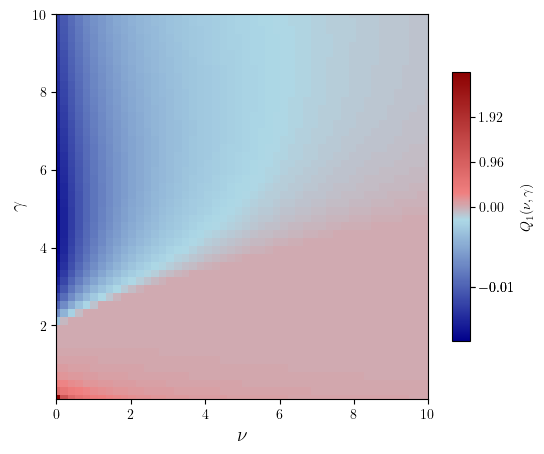

In [9]:
import numpy as np
from scipy.special import beta as B
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import warnings

# Suppress QuadPack errors that might appear due to numerical precision at some points
warnings.filterwarnings("ignore", category=UserWarning, module='scipy.integrate._quadpack')

# Define the integrand function
def integrand(x, nu, gamma):
    # The (1-x) term makes the integrand 0 at x=1, which is fine.
    # We explicitly handle x=0 to avoid potential log(0) issues in Beta function's internal gamma.
    if x == 0:
        return 0

    term1 = (1 - x)
    # Denominator (nu + gamma + 1) will always be positive given nu, gamma > 0.1
    term2 = (1 - (gamma + 1) * x) / (nu + gamma + 1)

    # Beta function arguments: nu*x+1 and nu*(1-x)+gamma
    # Given nu, gamma > 0.1 and x in [0,1], all arguments will be positive.
    try:
        beta_num = B(nu * x + 1, nu * (1 - x) + gamma)
        beta_den = B(nu * x + 1, nu * (1 - x) + 1) # Denominator argument nu*(1-x)+1 is always >= 1
        if beta_den == 0: # Avoid division by zero if Beta somehow returns exactly 0
            return 0
        term3 = beta_num / beta_den
    except (OverflowError, ValueError):
        # Catch potential issues from scipy.special.beta if arguments lead to extreme values
        # or non-positive values (though checked, edge cases can be tricky)
        return 0

    return term1 * term2 * term3

# Define the function Q(nu, gamma)
def Q(nu, gamma):
    # Use numerical integration from 0 to 1 for x
    result, _ = quad(integrand, 0, 1, args=(nu, gamma))
    return result

# Set up the range for nu and gamma
nu_values = np.linspace(0, 10, 50) # 50 points for nu between 0.1 and 10
gamma_values = np.linspace(0.1, 10, 50) # 50 points for gamma between 0.1 and 10

# Create a meshgrid for the 2D plot. Nu and Gamma will be 2D arrays.
Nu, Gamma = np.meshgrid(nu_values, gamma_values)

# Initialize a matrix to store the Z values (Q_values) corresponding to each (nu, gamma) pair
Q_values = np.zeros_like(Nu)

# Calculate Q(nu, gamma) for each pair of (nu, gamma) in the meshgrid

# Iterate through the grid and compute Q for each point
for i in range(Nu.shape[0]):
    for j in range(Nu.shape[1]):
        Q_values[i, j] = Q(Nu[i, j], Gamma[i, j])


# --- Custom Color Mapping ---
# Determine the min and max values of Q to set the color normalization range
q_min = np.min(Q_values)
q_max = np.max(Q_values)
pivot_value = 0 # The value where the color scheme transitions from blue to yellow

# TwoSlopeNorm helps in creating a diverging colormap centered at pivot_value (0)
norm = TwoSlopeNorm(vmin=q_min, vcenter=pivot_value, vmax=q_max)

# --- CHANGED: Red for positive values ---
colors = ["darkblue", "lightblue", "lightcoral", "darkred"] # Changed from yellow/orange to red shades
# 'lightcoral' for values just above 0, 'darkred' for most positive values.
nodes = [0.0, 0.45, 0.55, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue_red", list(zip(nodes, colors))) # Changed cmap name



# --- Create the 2D Heatmap Plot ---
fig, ax = plt.subplots(figsize=(6, 5)) # Create a figure and a single subplot (ax)

# Plot the heatmap using pcolormesh
# Nu, Gamma are the 2D arrays of coordinates. Q_values are the corresponding Z values.
# cmap is our custom colormap. norm applies the TwoSlopeNorm for correct color scaling.
# shading='auto' is recommended for pcolormesh (handles grid vs. cell centers).
heatmap_plot = ax.pcolormesh(Nu, Gamma, Q_values, cmap=custom_cmap, norm=norm, shading='auto')

# --- Axis Labels ---
ax.set_xlabel(r'$\nu$', fontsize=14)  # Set font size for x-axis label
ax.set_ylabel(r'$\gamma$', fontsize=14)  # Set font size for y-axis label
# No main title or z-axis title as per request.

# --- Colorbar Configuration ---
# Dynamically determine colorbar ticks to ensure they cover the full range of Q_values and include 0.
num_ticks = 7 # Desired number of ticks on the colorbar

if q_min < 0 < q_max:
    # If Q values span both negative and positive, create ticks for both sides
    neg_ticks = np.linspace(q_min, 0, num=int(num_ticks/2) + 1, endpoint=True)
    pos_ticks = np.linspace(0, q_max, num=int(num_ticks/2) + 1, endpoint=True)
    # Combine and remove potential duplicate 0
    cbar_ticks = np.unique(np.concatenate((neg_ticks, pos_ticks)))
    cbar_ticks = np.round(cbar_ticks, decimals=2) # Round for cleaner display
elif q_max <= 0: # If only negative or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)
else: # If only positive or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)

# Add the colorbar to the plot
cbar = fig.colorbar(heatmap_plot, ax=ax, shrink=0.7, aspect=15, label=r'$Q_1(\nu, \gamma)$', ticks=cbar_ticks)
cbar.ax.tick_params(labelsize=10) # Adjust font size of colorbar tick labels

# Set the limits of the axes explicitly to match the data range
ax.set_xlim([nu_values.min(), nu_values.max()])
ax.set_ylim([gamma_values.min(), gamma_values.max()])



# --- Save Figure Option ---
# This function will be called automatically when the plot window is closed.
plt.savefig("additional_migration.png", dpi=300, bbox_inches='tight') # Save with 300 DPI and tight layout


# Connect the 'on_close' function to the 'close_event' of the figure window
fig.canvas.mpl_connect('close_event', on_close)

plt.show() # Display the plot

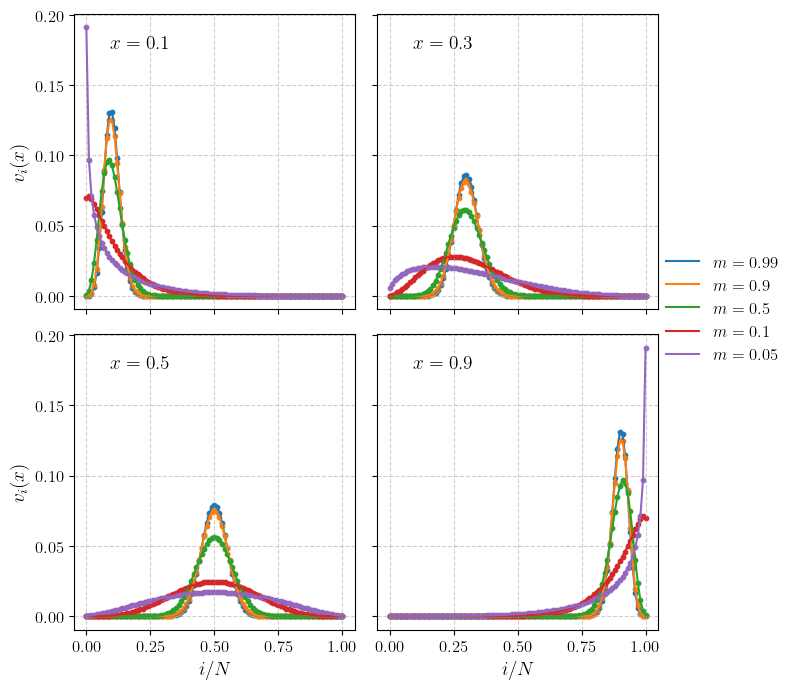

In [112]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────
#  USER-TUNABLE APPEARANCE SETTINGS
# ──────────────────────────────────────────────────────────
label_fs  = 14
tick_fs   = 12
title_fs  = 14          # font size for the in-plot x‐label
# position of the x-value text INSIDE each subplot (axes fraction coords)
x_text_pos = 0.13      # 0 = left … 1 = right
y_text_pos = 0.93       # 0 = bottom … 1 = top

mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.unicode_minus'] = False

# ──────────────────────────────────────────────────────────
#  MODEL PARAMETERS
# ──────────────────────────────────────────────────────────
N        = 100
x_vals   = [0.1, 0.3, 0.5, 0.9]
m_values = [0.99, 0.9, 0.5, 0.1, 0.05]

# ──────────────────────────────────────────────────────────
#  NUMERICAL HELPERS
# ──────────────────────────────────────────────────────────
def beta_log(a, b):
    return math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)

def v_i(i, N, m, x):
    Nm_over_1_minus_m = N * m / (1 - m)
    a1 = Nm_over_1_minus_m * x + i
    b1 = Nm_over_1_minus_m * (1 - x) + (N - i)
    a0 = Nm_over_1_minus_m * x
    b0 = Nm_over_1_minus_m * (1 - x)
    return math.comb(N, i) * math.exp(beta_log(a1, b1) - beta_log(a0, b0))

# ──────────────────────────────────────────────────────────
#  PRE-COMPUTE X-AXIS & SETUP SUBPLOTS
# ──────────────────────────────────────────────────────────
i_vals = np.arange(N + 1)
x_axis = i_vals / N

fig, axes = plt.subplots(2, 2, figsize=(8, 7), sharex=True, sharey=True)
axes = axes.ravel()

for idx, x_val in enumerate(x_vals):
    ax = axes[idx]
    for m in m_values:
        v_vals = [v_i(i, N, m, x_val) for i in i_vals]
        ax.plot(x_axis, v_vals, label=rf"$m={m}$")
        ax.scatter(x_axis, v_vals, s=10)

    # in-plot x-value label (replace former ax.set_title)
    ax.text(x_text_pos, y_text_pos, rf"$x={x_val}$",
            transform=ax.transAxes, fontsize=title_fs,
            va="top", ha="left")

    ax.grid(True, linestyle="--", alpha=0.6)
    ax.tick_params(labelsize=tick_fs)
    if idx % 2 == 0:
        ax.set_ylabel(r"$v_i(x)$", fontsize=label_fs)
    if idx >= 2:
        ax.set_xlabel(r"$i/N$", fontsize=label_fs)

# COMMON LEGEND (right side; knobs elsewhere in your script)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc="center left", bbox_to_anchor=(0.82, 0.55),
           frameon=False, fontsize=tick_fs)

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

fig.savefig("vi_subplots.png", dpi=300, bbox_inches="tight")


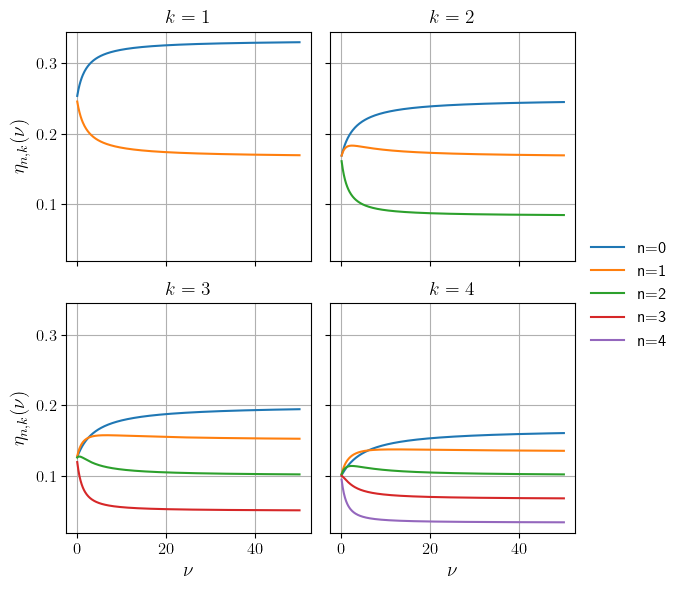

In [176]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ────────── text settings ──────────
mpl.rcParams['text.usetex'] = True          # use external LaTeX if available
mpl.rcParams['axes.unicode_minus'] = False

# ────────── parameters ─────────────
k_list     = [1, 2, 3, 4]        # four subplots
nu_min     = 0.1
nu_max     = 50.0
num_points = 400                 # ν resolution

# ────────── FONT SIZE KNOBS ────────
label_fs  = 14    # x-label & y-label
title_fs  = 14    # k-panel titles
tick_fs   = 12    # tick numbers
legend_fs = 12    # n-values in legend

# ────────── helpers ────────────────
def beta_log(a, b):
    return math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)

def integrand(x, nu, n, k):
    return (1 - x) * math.exp(
        beta_log(nu * x + n + 1, nu * (1 - x) + k + 1 - n)
        - beta_log(nu * x + 1,     nu * (1 - x) + 1)
    )

def F(nu, n, k):
    integral, _ = quad(integrand, 0, 1, args=(nu, n, k), epsabs=1e-9)
    return math.comb(k, n) * integral

# ────────── compute ────────────────
nu_vals = np.linspace(nu_min, nu_max, num_points)
results = {k: {n: np.array([F(nu, n, k) for nu in nu_vals])
               for n in range(k + 1)}
           for k in k_list}

# ────────── plot (2 × 2) ───────────
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
axes = axes.ravel()

for idx, k in enumerate(k_list):
    ax = axes[idx]
    for n, yvals in results[k].items():
        ax.plot(nu_vals, yvals, label=f"n={n}")    # ← fontsize removed here
    ax.set_title(f"$k={k}$", fontsize=title_fs)
    ax.grid(True)
    ax.tick_params(labelsize=tick_fs)
    if idx % 2 == 0:
        ax.set_ylabel(r"$\eta_{n,k}(\nu)$", fontsize=label_fs)
    if idx >= 2:
        ax.set_xlabel(r"$\nu$", fontsize=label_fs)

# legend outside, centred right
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels,
           loc="center left", bbox_to_anchor=(0.83, 0.5),
           frameon=False, fontsize=legend_fs)

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

fig.savefig("coefficients.png", dpi=300, bbox_inches="tight")

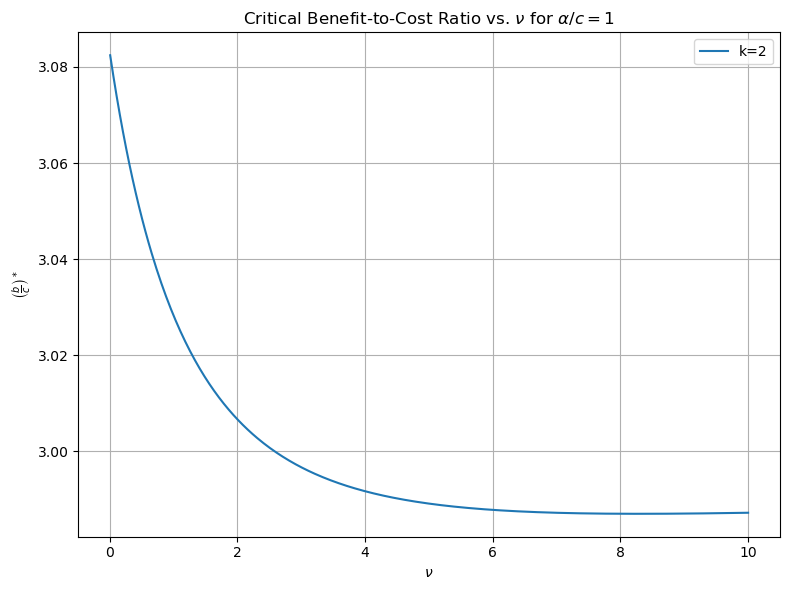

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha_over_c = 1
k_values = [2]

# Range for nu
nu = np.linspace(0.01, 10, 400)

# Plot (b/c)^* for each k
plt.figure(figsize=(8, 6))
for k in k_values:
    correction = (20 - 3 * nu**2) / (30 * (nu + 2) * (nu + 3) * (nu + 4))
    b_over_c_star = (k + 1) * (1 + alpha_over_c * correction)
    plt.plot(nu, b_over_c_star, label=f'k={k}')

# Plot aesthetics
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\left(\frac{b}{c}\right)^*$')
plt.title(r'Critical Benefit-to-Cost Ratio vs. $\nu$ for $\alpha/c = 1$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'on_close' is not defined

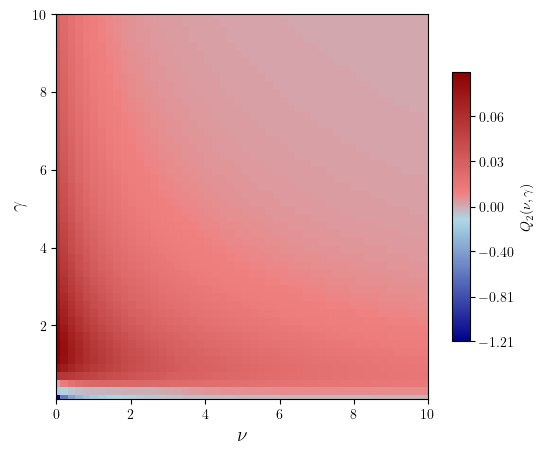

In [13]:
import numpy as np
from scipy.special import beta as B
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import warnings

# Suppress QuadPack errors that might appear due to numerical precision at some points
warnings.filterwarnings("ignore", category=UserWarning, module='scipy.integrate._quadpack')

# Define the integrand function
def integrand(x, nu, gamma):
    # The (1-x) term makes the integrand 0 at x=1, which is fine.
    # We explicitly handle x=0 to avoid potential log(0) issues in Beta function's internal gamma.
    if x == 0:
        return 0

    term1 = -x
    # Denominator (nu + gamma + 1) will always be positive given nu, gamma > 0.1
    term2 = (1 - (gamma + 1) * x) / (nu + gamma + 1)

    # Beta function arguments: nu*x+1 and nu*(1-x)+gamma
    # Given nu, gamma > 0.1 and x in [0,1], all arguments will be positive.
    try:
        beta_num = B(nu * x + 1, nu * (1 - x) + gamma)
        beta_den = B(nu * x + 1, nu * (1 - x) + 1) # Denominator argument nu*(1-x)+1 is always >= 1
        if beta_den == 0: # Avoid division by zero if Beta somehow returns exactly 0
            return 0
        term3 = beta_num / beta_den
    except (OverflowError, ValueError):
        # Catch potential issues from scipy.special.beta if arguments lead to extreme values
        # or non-positive values (though checked, edge cases can be tricky)
        return 0

    return term1 * term2 * term3

# Define the function Q(nu, gamma)
def Q(nu, gamma):
    # Use numerical integration from 0 to 1 for x
    result, _ = quad(integrand, 0, 1, args=(nu, gamma))
    return result

# Set up the range for nu and gamma
nu_values = np.linspace(0, 10, 50) # 50 points for nu between 0.1 and 10
gamma_values = np.linspace(0.1, 10, 50) # 50 points for gamma between 0.1 and 10

# Create a meshgrid for the 2D plot. Nu and Gamma will be 2D arrays.
Nu, Gamma = np.meshgrid(nu_values, gamma_values)

# Initialize a matrix to store the Z values (Q_values) corresponding to each (nu, gamma) pair
Q_values = np.zeros_like(Nu)

# Calculate Q(nu, gamma) for each pair of (nu, gamma) in the meshgrid

# Iterate through the grid and compute Q for each point
for i in range(Nu.shape[0]):
    for j in range(Nu.shape[1]):
        Q_values[i, j] = Q(Nu[i, j], Gamma[i, j])


# --- Custom Color Mapping ---
# Determine the min and max values of Q to set the color normalization range
q_min = np.min(Q_values)
q_max = np.max(Q_values)
pivot_value = 0 # The value where the color scheme transitions from blue to yellow

# TwoSlopeNorm helps in creating a diverging colormap centered at pivot_value (0)
norm = TwoSlopeNorm(vmin=q_min, vcenter=pivot_value, vmax=q_max)

# --- CHANGED: Red for positive values ---
colors = ["darkblue", "lightblue", "lightcoral", "darkred"] # Changed from yellow/orange to red shades
# 'lightcoral' for values just above 0, 'darkred' for most positive values.
nodes = [0.0, 0.45, 0.55, 1.0]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue_red", list(zip(nodes, colors))) # Changed cmap name



# --- Create the 2D Heatmap Plot ---
fig, ax = plt.subplots(figsize=(6, 5)) # Create a figure and a single subplot (ax)

# Plot the heatmap using pcolormesh
# Nu, Gamma are the 2D arrays of coordinates. Q_values are the corresponding Z values.
# cmap is our custom colormap. norm applies the TwoSlopeNorm for correct color scaling.
# shading='auto' is recommended for pcolormesh (handles grid vs. cell centers).
heatmap_plot = ax.pcolormesh(Nu, Gamma, Q_values, cmap=custom_cmap, norm=norm, shading='auto')

# --- Axis Labels ---
ax.set_xlabel(r'$\nu$', fontsize=14)  # Set font size for x-axis label
ax.set_ylabel(r'$\gamma$', fontsize=14)  # Set font size for y-axis label
# No main title or z-axis title as per request.

# --- Colorbar Configuration ---
# Dynamically determine colorbar ticks to ensure they cover the full range of Q_values and include 0.
num_ticks = 7 # Desired number of ticks on the colorbar

if q_min < 0 < q_max:
    # If Q values span both negative and positive, create ticks for both sides
    neg_ticks = np.linspace(q_min, 0, num=int(num_ticks/2) + 1, endpoint=True)
    pos_ticks = np.linspace(0, q_max, num=int(num_ticks/2) + 1, endpoint=True)
    # Combine and remove potential duplicate 0
    cbar_ticks = np.unique(np.concatenate((neg_ticks, pos_ticks)))
    cbar_ticks = np.round(cbar_ticks, decimals=2) # Round for cleaner display
elif q_max <= 0: # If only negative or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)
else: # If only positive or zero values
    cbar_ticks = np.linspace(q_min, q_max, num=num_ticks)
    cbar_ticks = np.round(cbar_ticks, decimals=2)

# Add the colorbar to the plot
cbar = fig.colorbar(heatmap_plot, ax=ax, shrink=0.7, aspect=15, label=r'$Q_2(\nu, \gamma)$', ticks=cbar_ticks)
cbar.ax.tick_params(labelsize=10) # Adjust font size of colorbar tick labels

# Set the limits of the axes explicitly to match the data range
ax.set_xlim([nu_values.min(), nu_values.max()])
ax.set_ylim([gamma_values.min(), gamma_values.max()])



# --- Save Figure Option ---
# This function will be called automatically when the plot window is closed.
plt.savefig("additional_migration_D.png", dpi=300, bbox_inches='tight') # Save with 300 DPI and tight layout


# Connect the 'on_close' function to the 'close_event' of the figure window
fig.canvas.mpl_connect('close_event', on_close)

plt.show() # Display the plot